In [2]:
!pip install lightgbm==3.3.2

In [3]:
import lightgbm
print(lightgbm.__version__)

3.3.2


In [4]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


# K_Obe

## 데이터 불러오고 정규화
- StandardScaler : ['Age', 'Height', 'Weight', 'CH2O']
- mm_scaler = ['CALC', 'FAF_Day', 'TUE', 'NCP', 'FCVC']

In [5]:
import pandas as pd

k_obe_df = pd.read_csv('/content/drive/MyDrive/KDT/프로젝트/세미 프로젝트/data/K_Obestiy_240227_AddedObe.csv')
k_obe_df

,Gender,Age,CALC,SMOKE,FAF_Time,FAF_Day,Height,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O,NObeyesdad,BMI,HE_BMI_pct
0,1,57,3,0,0.000000,0.0,1.793,82.0,4,2.571429,1,3.0,0,3.000000,4,25.5066412139419,
1,0,39,3,0,0.000000,0.0,1.599,59.0,4,1.714286,1,3.0,0,2.000000,3,23.0757106243309,
2,0,19,1,0,4.000000,4.0,1.697,63.1,4,1.357143,1,2.0,0,2.000000,2,21.9111753591992,
3,1,50,1,0,0.000000,0.0,1.722,55.1,4,2.143449,1,3.0,0,5.492455,2,18.5816940299816,
4,1,49,3,0,0.237481,2.0,1.798,90.1,4,1.714286,0,3.0,1,5.000000,4,27.8705421052436,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,1,62,3,1,0.000000,0.0,1.717,61.4,2,2.571429,1,3.0,0,3.000000,2,20.8270510150813,
3831,0,62,3,0,0.000000,0.0,1.633,64.8,1,2.571429,1,3.0,0,3.500000,3,24.2997964892044,
3832,1,62,0,1,0.000000,0.0,1.647,68.3,1,2.214286,1,3.0,0,2.000000,4,25.1787117125985,
3833,0,64,1,0,0.000000,0.0,1.596,63.5,1,2.571429,0,3.0,0,7.500000,3,24.9291775805428,


In [6]:
k_obe = k_obe_df.drop(['BMI', 'HE_BMI_pct', 'FAF_Time'], axis=1)
k_obe

,Gender,Age,CALC,SMOKE,FAF_Day,Height,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O,NObeyesdad
0,1,57,3,0,0.0,1.793,82.0,4,2.571429,1,3.0,0,3.000000,4
1,0,39,3,0,0.0,1.599,59.0,4,1.714286,1,3.0,0,2.000000,3
2,0,19,1,0,4.0,1.697,63.1,4,1.357143,1,2.0,0,2.000000,2
3,1,50,1,0,0.0,1.722,55.1,4,2.143449,1,3.0,0,5.492455,2
4,1,49,3,0,2.0,1.798,90.1,4,1.714286,0,3.0,1,5.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,1,62,3,1,0.0,1.717,61.4,2,2.571429,1,3.0,0,3.000000,2
3831,0,62,3,0,0.0,1.633,64.8,1,2.571429,1,3.0,0,3.500000,3
3832,1,62,0,1,0.0,1.647,68.3,1,2.214286,1,3.0,0,2.000000,4
3833,0,64,1,0,0.0,1.596,63.5,1,2.571429,0,3.0,0,7.500000,3


In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import copy

k_obe_Scaled =  copy.deepcopy(k_obe)
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
cont_vars = ['Age', 'Height', 'Weight', 'CH2O']
ord_vars = ['CALC', 'FAF_Day', 'TUE', 'NCP', 'FCVC']
k_obe_Scaled[cont_vars] = std_scaler.fit_transform(k_obe_Scaled[cont_vars])
k_obe_Scaled[ord_vars] = mm_scaler.fit_transform(k_obe_Scaled[ord_vars])
k_obe_Scaled

,Gender,Age,CALC,SMOKE,FAF_Day,Height,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O,NObeyesdad
0,1,1.014874,1.000000,0,0.000000,1.592583,1.198510,1.000000,1.000000,1,1.000000,0,-0.896240,4
1,0,-0.177216,1.000000,0,0.000000,-0.603569,-0.461753,1.000000,0.636364,1,1.000000,0,-1.331935,3
2,0,-1.501760,0.333333,0,0.571429,0.505827,-0.165793,1.000000,0.484848,1,0.666667,0,-1.331935,2
3,1,0.551283,0.333333,0,0.000000,0.788837,-0.743276,1.000000,0.818433,1,1.000000,0,0.189710,2
4,1,0.485056,1.000000,0,0.285714,1.649185,1.783212,1.000000,0.636364,0,1.000000,1,-0.024850,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,1,1.346010,1.000000,1,0.000000,0.732235,-0.288508,0.333333,1.000000,1,1.000000,0,-0.896240,2
3831,0,1.346010,1.000000,0,0.000000,-0.218677,-0.043078,0.000000,1.000000,1,1.000000,0,-0.678392,3
3832,1,1.346010,0.000000,1,0.000000,-0.060191,0.209571,0.000000,0.848485,1,1.000000,0,-1.331935,4
3833,0,1.478464,0.333333,0,0.000000,-0.637530,-0.136919,0.000000,1.000000,0,1.000000,0,1.064388,3


### 데이터 분할

In [8]:
from sklearn.model_selection import train_test_split
import pandas as pd

warnings.filterwarnings('ignore')

S_train, S_test, s_train, s_test = train_test_split(
    k_obe_Scaled.drop(['NObeyesdad'], axis=1),
    k_obe_Scaled['NObeyesdad'],
    random_state=42,
    stratify=k_obe_Scaled['NObeyesdad']
)

S_train, S_valid, s_train, s_valid = train_test_split(
    S_train,
    s_train,
    random_state=42,
    stratify=s_train
)
print(S_train.shape, S_valid.shape, S_test.shape, s_train.shape)


(2157, 13) (719, 13) (959, 13) (2157,)


### SMOTE 지정

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
S_train_over, s_train_over = smote.fit_resample(S_train, s_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', S_train.shape, s_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', S_train_over.shape, s_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포:' , pd.Series(s_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (2157, 13) (2157,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (5202, 13) (5202,)
SMOTE 적용 후 레이블 값 분포: 1    867
4    867
3    867
2    867
5    867
6    867
Name: NObeyesdad, dtype: int64


### SMOTE 디폴트 값

In [ ]:
import time
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

start_time = time.time()

# LGBMClassifier 모델 생성
s_gbm_clf = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.1
)

# 검증 데이터셋 설정
eval_sets = [
    (S_train_over, s_train_over),
    (S_valid, s_valid)
]

# 모델 훈련
s_gbm_clf.fit(
    S_train_over, s_train_over,
    early_stopping_rounds=50,
    eval_metric='multi_logloss',  # 다중 분류에 적합한 평가 지표 선택
    eval_set=eval_sets,
    verbose=True,
)

# 테스트 데이터에 대한 예측 수행
s_preds_test = s_gbm_clf.predict(S_test)
s_preds_train = s_gbm_clf.predict(S_train_over)

# 오차 행렬 계산
s_matrix = confusion_matrix(s_test,s_preds_test)
print(" SMOTE 오차 행렬 : \n{}".format(s_matrix))

# 정확도 계산
s_accuracy_test = accuracy_score(s_test, s_preds_test)
s_accuracy_train = accuracy_score(s_train_over, s_preds_train)

# 정밀도, 재현율, F1 스코어 계산
precision = precision_score(s_test, s_preds_test, average='weighted')
recall = recall_score(s_test, s_preds_test, average='weighted')
f1 = f1_score(s_test, s_preds_test, average='weighted')

print("train 정확도 : {}".format(s_accuracy_train))
print("test 정확도 : {}".format(s_accuracy_test))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

end_time = time.time()

training_time = end_time - start_time
print("Training time:", training_time, "seconds")

[1]	training's multi_logloss: 1.41416	valid_1's multi_logloss: 1.47346
[2]	training's multi_logloss: 1.15945	valid_1's multi_logloss: 1.25656
[3]	training's multi_logloss: 0.97104	valid_1's multi_logloss: 1.09435
[4]	training's multi_logloss: 0.828086	valid_1's multi_logloss: 0.974981
[5]	training's multi_logloss: 0.712715	valid_1's multi_logloss: 0.876079
[6]	training's multi_logloss: 0.618587	valid_1's multi_logloss: 0.796175
[7]	training's multi_logloss: 0.540704	valid_1's multi_logloss: 0.728741
[8]	training's multi_logloss: 0.473955	valid_1's multi_logloss: 0.670163
[9]	training's multi_logloss: 0.419816	valid_1's multi_logloss: 0.622129
[10]	training's multi_logloss: 0.369819	valid_1's multi_logloss: 0.572151
[11]	training's multi_logloss: 0.330463	valid_1's multi_logloss: 0.535939
[12]	training's multi_logloss: 0.292755	valid_1's multi_logloss: 0.499395
[13]	training's multi_logloss: 0.262205	valid_1's multi_logloss: 0.470532
[14]	training's multi_logloss: 0.233629	valid_1's mul

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

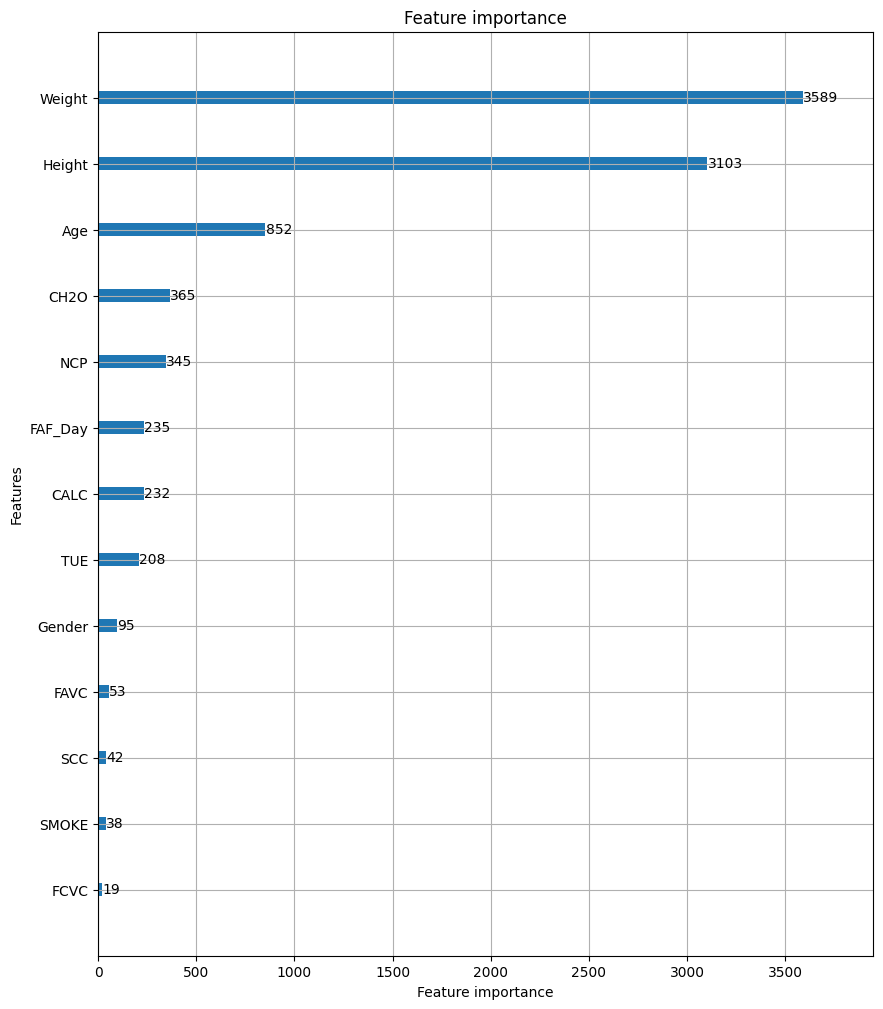

In [ ]:
# 모델의 특성 중요도 확인
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(s_gbm_clf, ax=ax)

### hyperopt

In [10]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import numpy as np
from hyperopt import hp, fmin, Trials, tpe
from hyperopt import hp

# 하이퍼 파라미터에 대해 검색할 범위를 지정 -> 입력 변수명과 입력값의 검색 공간을 설정
sgbm_search_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 100)
}

# 목적함수 생성 -> K-fold 교차 검증을 수행해 각 폴드에서 모델을 학습하고 검증. 이후 검증세트에 대한 ROC AUC 점수의 평균을 반환함
def objective_func(search_space):
    sgbm_opt = LGBMClassifier(
        random_state=42,
        num_leaves=int(search_space['num_leaves']),
        max_depth=int(search_space['max_depth']),
        min_child_samples=int(search_space['min_child_samples']),
        subsample=search_space['subsample'],
        learning_rate=search_space['learning_rate'],
        n_estimators=int(search_space['n_estimators']),
        n_jobs=-1,
        objective='multiclass'  # 다중 분류 문제 설정
    )

    f1_score_list = []

    # 그리드 서치의 cv=3의 역할
    kf = KFold(n_splits=3)
    for tr_index, val_index in kf.split(S_train_over):
        S_tr, s_tr = S_train_over.iloc[tr_index], s_train_over.iloc[tr_index]
        S_val, s_val = S_train_over.iloc[val_index], s_train_over.iloc[val_index]

        sgbm_opt.fit(
            S_tr,
            s_tr,
            early_stopping_rounds=50,
            eval_set=[(S_tr, s_tr), (S_val, s_val)],
            eval_metric='multi_logloss',
            verbose=False  # 출력을 최소화합니다.
        )

        score = f1_score(s_val, sgbm_opt.predict(S_val), average='weighted')
        f1_score_list.append(score)

    return -1 * np.mean(f1_score_list)

# 하이퍼파라미터 최적화
trials = Trials()
best = fmin(
    fn=objective_func,
    space=sgbm_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(seed=30)
)

print("Best hyperparameters:", best)


100%|██████████| 50/50 [04:51<00:00,  5.82s/trial, best loss: -0.9213779516996438]
Best hyperparameters: {'learning_rate': 0.1023187523798992, 'max_depth': 10.0, 'min_child_samples': 77.0, 'n_estimators': 200.0, 'num_leaves': 60.0, 'subsample': 0.7888644278654483}


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# 최적의 하이퍼파라미터를 사용하여 모델 학습
best_model = LGBMClassifier(
    num_leaves=int(best['num_leaves']),
    max_depth=int(best['max_depth']),
    min_child_samples=int(best['min_child_samples']),
    subsample=best['subsample'],
    learning_rate=best['learning_rate'],
    n_estimators=int(best['n_estimators']),
    random_state=42,
    objective='multiclass'
)

best_model.fit(S_train_over, s_train_over)

# 모델을 사용하여 예측 수행
s_preds_test = best_model.predict(S_test)
s_preds_train = best_model.predict(S_train_over)

# 오차 행렬 계산
y_matrix = confusion_matrix(s_test, s_preds_test)
print("오차 행렬 : \n{}".format(y_matrix))

# 성능 평가하기
accuracy_test = accuracy_score(s_test, s_preds_test)
accuracy_train = accuracy_score(s_train_over, s_preds_train)

precision = precision_score(s_test, s_preds_test, average='weighted')
recall = recall_score(s_test, s_preds_test, average='weighted')
f1_test = f1_score(s_test, s_preds_test, average='weighted')
f1_train = f1_score(s_preds_train, s_train_over, average='weighted')

print("test 정확도 : {}".format(accuracy_test))
print("train 정확도 : {}".format(accuracy_train))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("f1_train : {}".format(f1_train))
print("f1_test : {}".format(f1_test))

오차 행렬 : 
[[ 44   5   0   0   0   0]
 [  5 365  16   0   0   0]
 [  0   9 182   9   0   0]
 [  0   0   7 251   4   0]
 [  0   0   0   5  46   2]
 [  0   0   0   0   0   9]]
test 정확도 : 0.935349322210636
train 정확도 : 1.0
정밀도 : 0.9359588397722013
재현율 : 0.935349322210636
f1_train : 1.0
f1_test : 0.9354576840680895


왜 은아님꺼랑 값이 다르지 확인해보니 행의 개수가 다름.
나는 3835, 은아님껀 3950
우리 3835로 하기로 한거같은데,한번 확인해보기

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

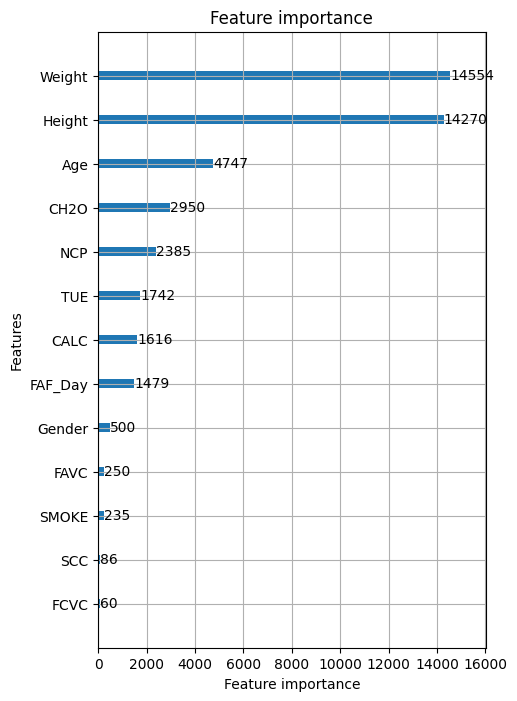

In [ ]:
# 모델의 특성 중요도 확인
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5, 8))
plot_importance(best_model, ax=ax)

# 캐글_Obe
종속변수 6개로 pca

## 데이터 불러오고 정규화
- StandardScaler : ['Age', 'Height', 'Weight']
- mm_scaler = ['CALC', 'FAF_Day', 'TUE', 'NCP', 'FCVC', 'CH2O']

In [12]:
import pandas as pd
obesity_df = pd.read_csv("/content/drive/MyDrive/KDT/프로젝트/세미 프로젝트/data/ObesityDataSet_Labeled_merge.csv")
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,2,1,24.386526
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,2,1,24.238227
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,2,1,23.765432
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,3,2,26.851852
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,2,3,28.342381


In [13]:
print(obesity_df['NObeyesdad'].value_counts())


4    351
6    324
5    297
2    290
3    290
1    287
0    272
Name: NObeyesdad, dtype: int64


In [14]:
change_NObeyesdad_value_dict = {
    0: 0,
    1: 1,
    2 : 2,
    3 : 2,
    4 : 3,
    5 : 4,
    6 : 5
}
obesity_df = obesity_df.replace({'NObeyesdad': change_NObeyesdad_value_dict})
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,2,1,24.386526
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,2,1,24.238227
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,2,1,23.765432
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,3,2,26.851852
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,2,2,28.342381


In [15]:
print(obesity_df['NObeyesdad'].value_counts())

2    580
3    351
5    324
4    297
1    287
0    272
Name: NObeyesdad, dtype: int64


In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
original_labeled_Scaled = obesity_df
cont_vars = ['Age', 'Height', 'Weight']
ordinal_vars = ['CALC', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
original_labeled_Scaled[cont_vars] = std_scaler.fit_transform(original_labeled_Scaled[cont_vars])
original_labeled_Scaled[ordinal_vars] = mm_scaler.fit_transform(original_labeled_Scaled[ordinal_vars])

original_labeled_Scaled.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
count,2111.000000,2111.000000,2.111000e+03,2.111000e+03,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,0.000000,-5.385449e-16,-5.385449e-16,0.817622,0.883941,0.709522,0.561876,1.140692,0.020843,0.504006,0.045476,0.336766,0.328933,0.243802,1.808148,2.514448,29.700159
std,0.500083,1.000237,1.000237e+00,1.000237e+00,0.386247,0.320371,0.266963,0.259346,0.468543,0.142893,0.306477,0.208395,0.283531,0.304464,0.171833,0.463502,1.580586,8.011337
min,0.000000,-1.625448,-2.698006e+00,-1.817304e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.998685
25%,0.000000,-0.688066,-7.683883e-01,-8.062914e-01,1.000000,1.000000,0.500000,0.552913,1.000000,0.000000,0.292406,0.000000,0.041502,0.000000,0.000000,2.000000,1.000000,24.325802
50%,1.000000,-0.241897,-1.263207e-02,-1.369510e-01,1.000000,1.000000,0.692751,0.666667,1.000000,0.000000,0.500000,0.000000,0.333333,0.312675,0.333333,2.000000,2.000000,28.719089
75%,1.000000,0.265964,7.159595e-01,7.960531e-01,1.000000,1.000000,1.000000,0.666667,1.000000,0.000000,0.738710,0.000000,0.555559,0.500000,0.333333,2.000000,4.000000,36.016501
max,1.000000,5.782584,2.983646e+00,3.300136e+00,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,50.811753


### 디폴트값

In [ ]:
import warnings
from sklearn.model_selection import train_test_split
import pandas as pd

warnings.filterwarnings('ignore')

L_train, L_test, l_train, l_test = train_test_split(
    original_labeled_Scaled.drop(["BMI", "NObeyesdad", "family_history_with_overweight", "CAEC", "MTRANS"], axis=1),
    original_labeled_Scaled['NObeyesdad'],
    random_state=42,
    stratify=obesity_df['NObeyesdad']
)

L_train, L_valid, l_train, l_valid = train_test_split(
    L_train,
    l_train,
    random_state=42,
    stratify=l_train
)

print(L_train.shape, L_valid.shape, L_test.shape)
L_train

(1187, 13) (396, 13) (528, 13)


,Gender,Age,Height,Weight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,CALC
144,1,-0.364507,-0.982790,-0.747989,0,0.500000,1.000000,0,1.000000,1,0.666667,1.000000,0.333333
1836,0,-0.539227,0.499939,1.794454,1,1.000000,0.666667,0,0.937168,0,0.541660,0.412805,0.333333
95,1,0.265964,-0.017981,-0.633419,0,1.000000,0.000000,0,0.500000,0,0.666667,0.000000,0.666667
1022,0,-0.132881,-2.085824,-0.831467,0,0.626236,0.995551,0,0.500000,0,0.311429,0.445313,0.000000
513,0,-0.483801,-1.111228,-1.594060,0,1.000000,0.242087,0,0.722063,0,0.439390,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098,0,0.264758,-1.020589,0.701480,1,1.000000,0.666667,0,0.665561,0,0.021128,0.280830,0.333333
1110,1,0.054378,0.076355,-0.117088,1,0.844788,0.571372,0,0.639607,0,0.323554,0.414274,0.333333
2071,0,-0.859069,0.478113,1.608545,1,1.000000,0.666667,0,0.705791,0,0.328429,0.337538,0.333333
1497,0,-0.994977,-0.093955,0.128044,1,0.909251,0.666667,0,0.495626,0,0.497656,0.000000,0.000000


[1]	training's multi_logloss: 1.35787	valid_1's multi_logloss: 1.3788
[2]	training's multi_logloss: 1.11466	valid_1's multi_logloss: 1.15311
[3]	training's multi_logloss: 0.935333	valid_1's multi_logloss: 0.98359
[4]	training's multi_logloss: 0.796758	valid_1's multi_logloss: 0.852928
[5]	training's multi_logloss: 0.685488	valid_1's multi_logloss: 0.749509
[6]	training's multi_logloss: 0.59266	valid_1's multi_logloss: 0.660346
[7]	training's multi_logloss: 0.516686	valid_1's multi_logloss: 0.587023
[8]	training's multi_logloss: 0.452458	valid_1's multi_logloss: 0.525606
[9]	training's multi_logloss: 0.397617	valid_1's multi_logloss: 0.472085
[10]	training's multi_logloss: 0.34859	valid_1's multi_logloss: 0.424258
[11]	training's multi_logloss: 0.305355	valid_1's multi_logloss: 0.382425
[12]	training's multi_logloss: 0.270137	valid_1's multi_logloss: 0.348528
[13]	training's multi_logloss: 0.238497	valid_1's multi_logloss: 0.31786
[14]	training's multi_logloss: 0.209587	valid_1's multi_

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

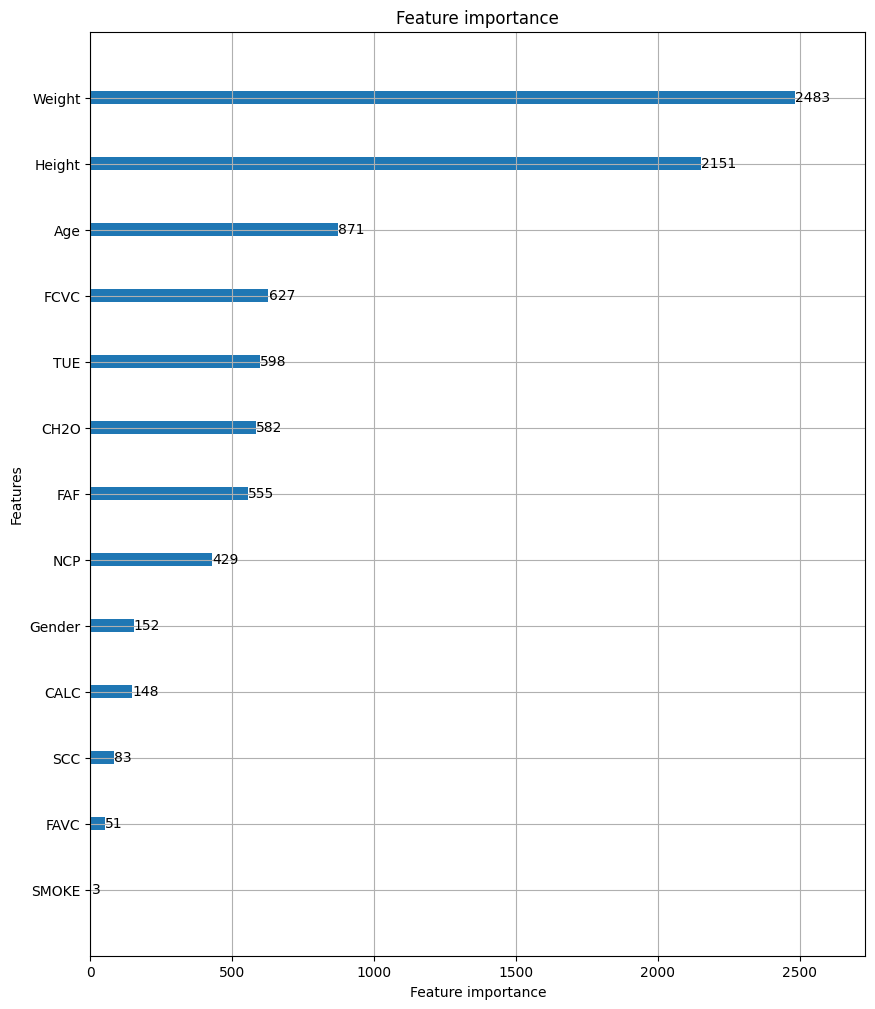

In [ ]:
import time
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

start_time = time.time()

# LGBMClassifier 모델 생성
lgbm_clf = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.1
)

# 검증 데이터셋 설정
eval_sets = [
    (L_train, l_train),
    (L_valid, l_valid)
]

# 모델 훈련
lgbm_clf.fit(
    L_train, l_train,
    early_stopping_rounds=50,
    eval_metric='multi_logloss',  # 다중 분류에 적합한 평가 지표 선택
    eval_set=eval_sets,
    verbose=True,
)

# 테스트 데이터에 대한 예측 수행
preds_test = lgbm_clf.predict(L_test)
preds_train = lgbm_clf.predict(L_train)

# 오차 행렬 계산
l_matrix = confusion_matrix(l_test, preds_test)
print("오차 행렬 : \n{}".format(l_matrix))

# 정확도 계산
accuracy_test = accuracy_score(l_test, preds_test)
accuracy_train = accuracy_score(l_train, preds_train)

# 정밀도, 재현율, F1 스코어 계산
precision = precision_score(l_test, preds_test, average='weighted')
recall = recall_score(l_test, preds_test, average='weighted')
f1 = f1_score(l_test, preds_test, average='weighted')

print("train 정확도 : {}".format(accuracy_train))
print("test 정확도 : {}".format(accuracy_test))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

end_time = time.time()

# 학습 소요 시간 계산
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

# 모델의 특성 중요도 확인
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_clf, ax=ax)

### hyperopt
기존 obe의 값은 rou_auc로 점수를 냈기에 위에꺼와 통일성을 주고자  f1으로 새로 분석함

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np
from hyperopt import hp, fmin, Trials, tpe
from hyperopt import hp

# 하이퍼 파라미터에 대해 검색할 범위를 지정 -> 입력 변수명과 입력값의 검색 공간을 설정
lgbm_search_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 100)
}

# 목적함수 생성 -> K-fold 교차 검증을 수행해 각 폴드에서 모델을 학습하고 검증. 이후 검증세트에 대한 ROC AUC 점수의 평균을 반환함
def objective_func(search_space):
    lgbm_opt = LGBMClassifier(
        random_state=42,
        num_leaves=int(search_space['num_leaves']),
        max_depth=int(search_space['max_depth']),
        min_child_samples=int(search_space['min_child_samples']),
        subsample=search_space['subsample'],
        learning_rate=search_space['learning_rate'],
        n_estimators=int(search_space['n_estimators']),
        n_jobs=-1,
        objective='multiclass'  # 다중 분류 문제 설정
    )

    roc_auc_list = []

    # 그리드 서치의 cv=3의 역할
    kf = KFold(n_splits=3)
    for tr_index, val_index in kf.split(L_train):
        L_tr, l_tr = L_train.iloc[tr_index], l_train.iloc[tr_index]
        L_val, l_val = L_train.iloc[val_index], l_train.iloc[val_index]

        lgbm_opt.fit(
            L_tr,
            l_tr,
            early_stopping_rounds=50,
            eval_set=[(L_tr, l_tr), (L_val, l_val)],
            eval_metric='multi_logloss',
            # objective='multi:softmax', # lgbm에서 자동으로 다중분류를 지원함
            verbose=False  # 출력을 최소화합니다.
        )

        score = f1_score(l_val, lgbm_opt.predict(L_val), average='weighted')
        roc_auc_list.append(score)

    return -1 * np.mean(roc_auc_list)

# 하이퍼파라미터 최적화
trials = Trials()
best = fmin(fn=objective_func, # Hyperopt의 함수인 'fmin'을 통해 최적화 수행하고 fn에 목적함수를 삽입
            space=lgbm_search_space, # 하이퍼파라미터 탐색 공간을 삽입
            algo=tpe.suggest, # 최적화 알고리즘 삽
            max_evals=50,
            trials=trials,
            rstate=np.random.default_rng(seed=30))

print("Best hyperparameters:", best)


100%|██████████| 50/50 [01:42<00:00,  2.05s/trial, best loss: -0.9670810231493686]
Best hyperparameters: {'learning_rate': 0.09059172194283983, 'max_depth': 7.0, 'min_child_samples': 72.0, 'n_estimators': 1000.0, 'num_leaves': 32.0, 'subsample': 0.9367916181223708}


In [ ]:
# 최적의 하이퍼파라미터를 사용하여 모델 학습
best_model = LGBMClassifier(
    num_leaves=int(best['num_leaves']),
    max_depth=int(best['max_depth']),
    min_child_samples=int(best['min_child_samples']),
    subsample=best['subsample'],
    learning_rate=best['learning_rate'],
    n_estimators=int(best['n_estimators']),
    random_state=42,
    objective='multiclass'
)
best_model.fit(L_train, l_train)

# 모델을 사용하여 예측 수행
final_preds_train = best_model.predict(L_train)
final_preds_test = best_model.predict(L_test)

# 오차 행렬 계산
y_matrix = confusion_matrix(l_test, final_preds_test)
print("오차 행렬 : \n{}".format(y_matrix))

# 성능 평가하기
test_accuracy = accuracy_score(l_test, final_preds_test)
train_accuracy = accuracy_score(l_train, final_preds_train)

precision = precision_score(l_test, final_preds_test, average='weighted')
recall = recall_score(l_test, final_preds_test, average='weighted')
f1 = f1_score(l_test, final_preds_test, average='weighted')

print("test 정확도 : {}".format(test_accuracy))
print("train 정확도 : {}".format(train_accuracy))

print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

오차 행렬 : 
[[ 65   3   0   0   0   0]
 [  1  69   2   0   0   0]
 [  0   2 143   0   0   0]
 [  0   0   2  86   0   0]
 [  0   0   0   2  72   0]
 [  0   0   0   0   1  80]]
test 정확도 : 0.9753787878787878
train 정확도 : 1.0
정밀도 : 0.9756544606882624
재현율 : 0.9753787878787878
F1 : 0.975439738726875


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

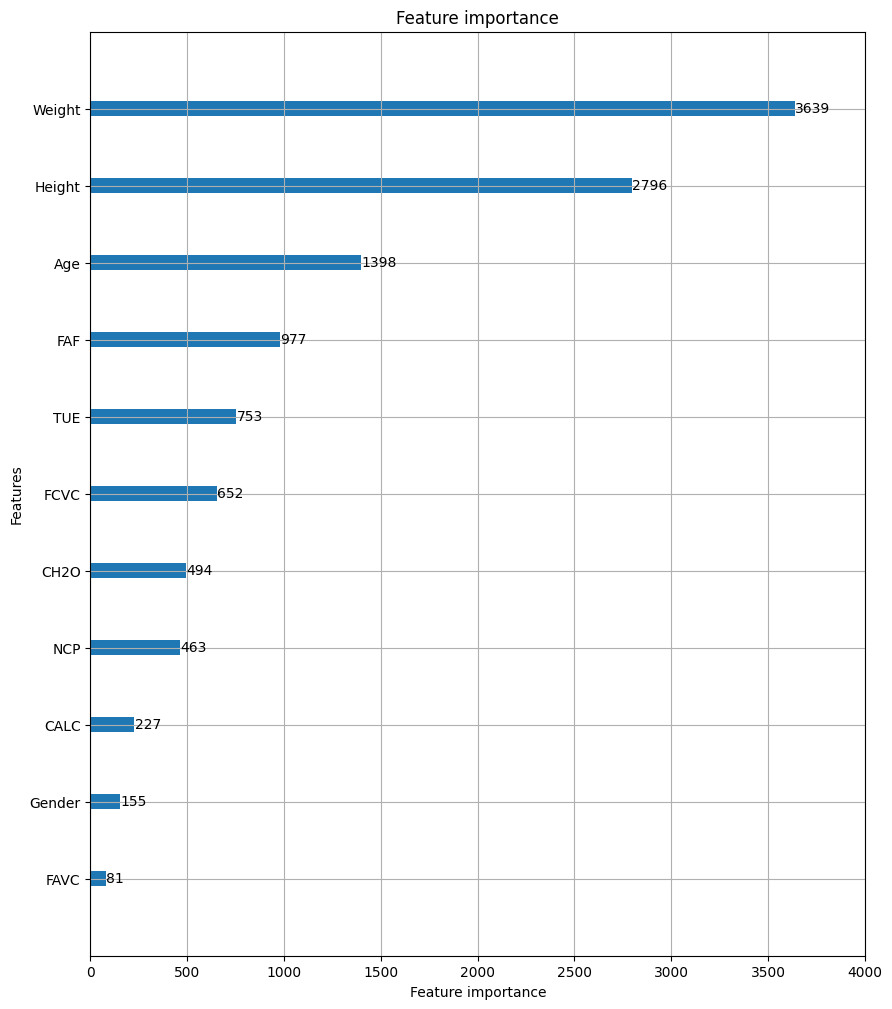

In [ ]:
# 모델의 특성 중요도 확인
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(best_model, ax=ax)

### hyperopt_rou_auc
원래 나온 값보다 낮아서 다시 보기

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np
from hyperopt import hp, fmin, Trials, tpe
from hyperopt import hp

# 하이퍼 파라미터에 대해 검색할 범위를 지정 -> 입력 변수명과 입력값의 검색 공간을 설정
lgbm_search_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 100)
}

# 목적함수 생성 -> K-fold 교차 검증을 수행해 각 폴드에서 모델을 학습하고 검증. 이후 검증세트에 대한 ROC AUC 점수의 평균을 반환함
def objective_func(search_space):
    lgbm_opt = LGBMClassifier(
        random_state=42,
        num_leaves=int(search_space['num_leaves']),
        max_depth=int(search_space['max_depth']),
        min_child_samples=int(search_space['min_child_samples']),
        subsample=search_space['subsample'],
        learning_rate=search_space['learning_rate'],
        n_estimators=int(search_space['n_estimators']),
        n_jobs=-1,
        objective='multiclass'  # 다중 분류 문제 설정
    )

    roc_auc_list = []

    # 그리드 서치의 cv=3의 역할
    kf = KFold(n_splits=3)
    for tr_index, val_index in kf.split(L_train):
        L_tr, l_tr = L_train.iloc[tr_index], l_train.iloc[tr_index]
        L_val, l_val = L_train.iloc[val_index], l_train.iloc[val_index]

        lgbm_opt.fit(
            L_tr,
            l_tr,
            early_stopping_rounds=50,
            eval_set=[(L_tr, l_tr), (L_val, l_val)],
            eval_metric='multi_logloss',
            # objective='multi:softmax', # lgbm에서 자동으로 다중분류를 지원함
            verbose=False  # 출력을 최소화합니다.
        )

        score = roc_auc_score(l_val, lgbm_opt.predict_proba(L_val), multi_class='ovr')
        roc_auc_list.append(score)

    return -1 * np.mean(roc_auc_list)

# 하이퍼파라미터 최적화
trials = Trials()
best = fmin(fn=objective_func, # Hyperopt의 함수인 'fmin'을 통해 최적화 수행하고 fn에 목적함수를 삽입
            space=lgbm_search_space, # 하이퍼파라미터 탐색 공간을 삽입
            algo=tpe.suggest, # 최적화 알고리즘 삽
            max_evals=50,
            trials=trials,
            rstate=np.random.default_rng(seed=30))

print("Best hyperparameters:", best)


100%|██████████| 50/50 [01:28<00:00,  1.78s/trial, best loss: -0.9981341168395591]
Best hyperparameters: {'learning_rate': 0.1723756627595039, 'max_depth': 10.0, 'min_child_samples': 91.0, 'n_estimators': 700.0, 'num_leaves': 50.0, 'subsample': 0.8881368989355738}


In [ ]:
# 최적의 하이퍼파라미터를 사용하여 모델 학습
best_model = LGBMClassifier(
    num_leaves=int(best['num_leaves']),
    max_depth=int(best['max_depth']),
    min_child_samples=int(best['min_child_samples']),
    subsample=best['subsample'],
    learning_rate=best['learning_rate'],
    n_estimators=int(best['n_estimators']),
    random_state=42,
    objective='multiclass'
)
best_model.fit(L_train, l_train)

# 모델을 사용하여 예측 수행
final_preds_train = best_model.predict(L_train)
final_preds_test = best_model.predict(L_test)

# 오차 행렬 계산
y_matrix = confusion_matrix(l_test, final_preds_test)
print("오차 행렬 : \n{}".format(y_matrix))

# 성능 평가하기
test_accuracy = accuracy_score(l_test, final_preds_test)
train_accuracy = accuracy_score(l_train, final_preds_train)

precision = precision_score(l_test, final_preds_test, average='weighted')
recall = recall_score(l_test, final_preds_test, average='weighted')
f1 = f1_score(l_test, final_preds_test, average='weighted')

print("test 정확도 : {}".format(test_accuracy))
print("train 정확도 : {}".format(train_accuracy))

print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

오차 행렬 : 
[[ 65   3   0   0   0   0]
 [  1  69   2   0   0   0]
 [  0   2 143   0   0   0]
 [  0   0   2  86   0   0]
 [  0   0   0   2  72   0]
 [  0   0   0   0   1  80]]
test 정확도 : 0.9753787878787878
train 정확도 : 1.0
정밀도 : 0.9756544606882624
재현율 : 0.9753787878787878
F1 : 0.975439738726875


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

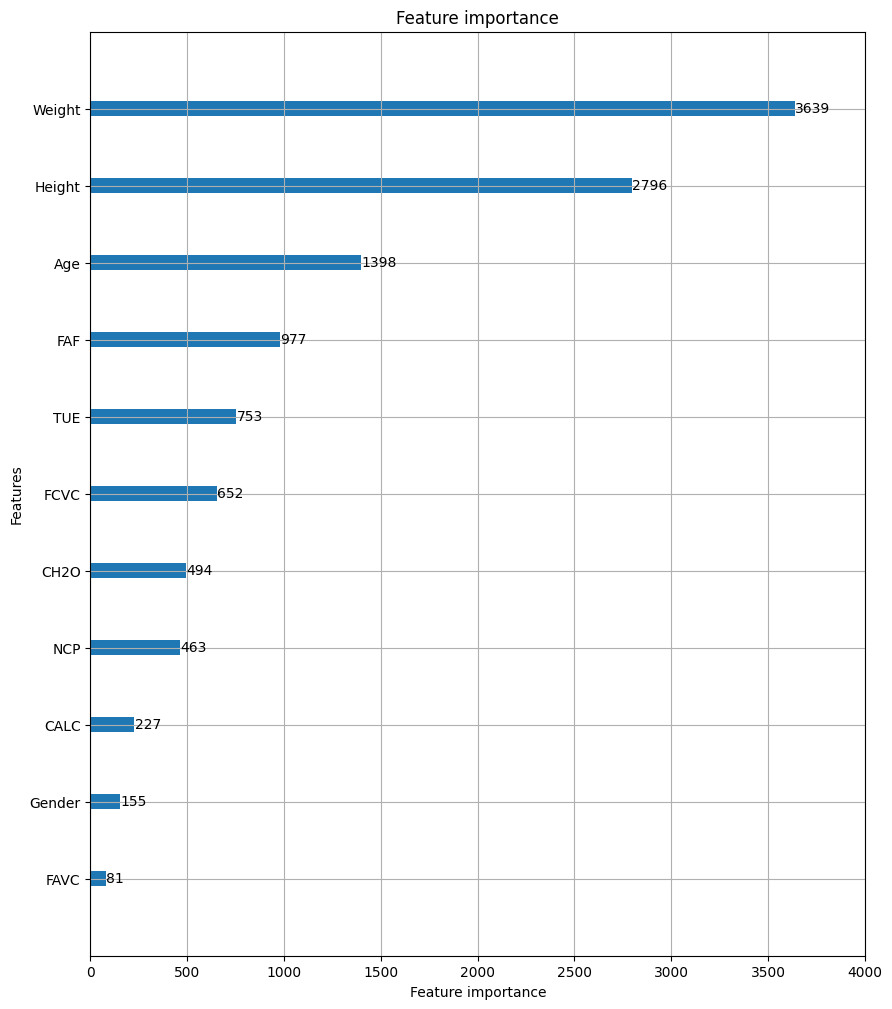

In [ ]:
# 모델의 특성 중요도 확인
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(best_model, ax=ax)

이게 값이 더 잘나오긴함